In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [6]:
EGS11Tyl = candels[-5]

delz = EGS11Tyl[0]
nearby = EGS11Tyl[1][1]
host = EGS11Tyl[1][2]
lc = EGS11Tyl[1][3]

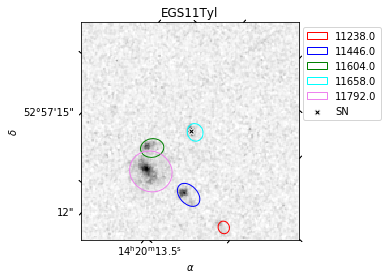

In [8]:
nick = EGS11Tyl[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(EGS11Tyl[1][0]['RA'],EGS11Tyl[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.009,val_max = .0585 )

In [9]:
EGS11Tyl[1][0]

name,nickname,col2,decliner,REPROC,RA,DEC,Host RA,Host DEC,zSN,dzSN,zHost,dzHost,Host Morphology,Host SED Type,PIaz,dPIaz,PIaHost,dPIaHost,galsnidShift,zSNold,dzSNold,zSN Source,zHost Source
str9,str12,str1,str1,str1,str12,str13,str12,str13,str5,str6,str8,str7,str7,str7,str4,str11,str4,str11,str5,str6,str6,str23,str47
EGS11Tyl,Tyler,A,0,y,14:20:12.944,+52:57:10.60,14:20:12.938,+52:57:10.62,2.244,0.095,1.95,0.45,sd,SB,0.24,+0.13 -0.15,0.57,+0.03 -0.04,0.33,2.1,0.2,host+SN phot-z,phot-z (T.Dahlen)
